<h2 style="text-align: center; font-weight: 700;">AutoEncoder for Dimensionality Reduction</h2>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
X = pd.DataFrame(X)
X.columns = ['X0', 'X1', 'X2', 'X3']
X.head()

,X0,X1,X2,X3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

In [6]:
X_scaled_train = X_scaled[: int(X_scaled.shape[0]*0.8), :]
X_scaled_test = X_scaled[int(X_scaled.shape[0]*0.8):, :]

In [7]:
input_dim = X_scaled.shape[1]
encoding_dim = 2
input_ = Input(shape=(input_dim,))

In [8]:
encoded = Dense(encoding_dim, activation='linear')(input_)
decoded = Dense(input_dim, activation='linear')(encoded)

In [9]:
autoencoder = Model(input_, decoded)
autoencoder.compile(optimizer = "adam", loss="mse")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [10]:
aehist = autoencoder.fit(X_scaled_train, X_scaled_train, validation_data=(X_scaled_test, X_scaled_test), epochs = 1000, batch_size = 16, shuffle=True, verbose=0)

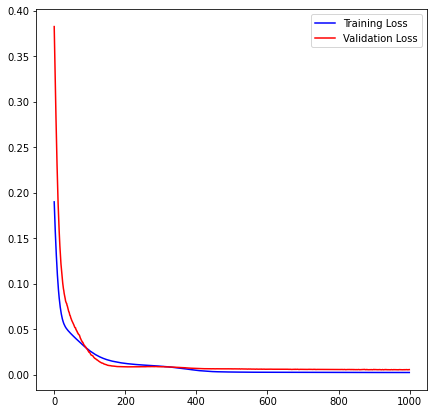

In [11]:
plt.figure(figsize=(7,7))
plt.plot(aehist.history['loss'], color='b')
plt.plot(aehist.history['val_loss'], color='r')
plt.legend(['Training Loss','Validation Loss'],loc='best')
plt.show()

In [12]:
X_scaled_pred = autoencoder.predict(X_scaled_test)

1/1 [==============================] - 0s 74ms/step
